In [66]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [67]:
! ls ../zippedData/

GrossMargin_and_genre_df.csv
Netflix_movies_and_tv_shows_clustering.csv.zip
all-weeks-global.tsv
bom.movie_gross.csv.gz
im.db.zip
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz
top-netflix-scraper.ipynb
video_game_films.csv


# exploring bom.movie_gross.csv.gz

In [68]:
df_bom = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')
df_bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [69]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [70]:
df_bom.set_index(['year'])

,title,studio,domestic_gross,foreign_gross
year,,,,
2010,Toy Story 3,BV,415000000.0,652000000
2010,Alice in Wonderland (2010),BV,334200000.0,691300000
2010,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000
2010,Inception,WB,292600000.0,535700000
2010,Shrek Forever After,P/DW,238700000.0,513900000
...,...,...,...,...
2018,The Quake,Magn.,6200.0,NaN
2018,Edward II (2018 re-release),FM,4800.0,NaN
2018,El Pacto,Sony,2500.0,NaN


## exploring rt.movie_info.tsv.gz

In [71]:
df_rt = pd.read_csv('../zippedData/rt.movie_info.tsv.gz', delimiter='\t')
df_rt.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [72]:
df_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


## exploring tmdb.movies.csv.gz

In [73]:
df_tmdb = pd.read_csv('../zippedData/tmdb.movies.csv.gz', index_col=[0])
df_tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee
    the page has all meaning for genre_ids codes, will try to change values of data frame, so genre can be desplayed from data frame

In [74]:
list_of_numberStrings = df_tmdb['genre_ids'].tolist()


## exploring tn.movie_budgets.csv.gz

In [75]:
df_tn = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz')


In [76]:
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


transform objt to int for all numeric columns

removing all commas from numeric data

In [77]:
df_tn['production_budget'] = df_tn['production_budget'].str.replace(',','')

removing all $ from numeric data

In [78]:
df_tn['production_budget'] = df_tn['production_budget'].str.replace('$','')

In [79]:
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382","$1,316,721,747"


doing the same for domestic_gross and worldwide_gross columns

In [80]:
df_tn['domestic_gross'] = df_tn['domestic_gross'].str.replace(',','')
df_tn['domestic_gross'] = df_tn['domestic_gross'].str.replace('$','')

In [81]:
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace(',','')
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace('$','')

converting values from str to int

In [82]:
df_tn['production_budget'] = df_tn['production_budget'].astype(int)
df_tn['domestic_gross'] = df_tn['domestic_gross'].astype(int)
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].astype(int)

In [83]:
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [84]:
df_tn['gross_margin']= df_tn['worldwide_gross'] - df_tn['production_budget']


movies with largest gross margin

In [85]:
df_tn.sort_values(by=['gross_margin'], ascending=False).head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864


## combining 2 data frames to get genre column into frame with movies earnings

In [86]:
#set movie column as index
df_tmdb.set_index(['title'], inplace= True)
df_tn.set_index(['movie'], inplace= True)


In [87]:
merged_df = df_tn.merge(df_tmdb, how = 'inner', left_index=True, right_index=True)

merged_df

,id_x,release_date_x,production_budget,domestic_gross,worldwide_gross,gross_margin,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count
#Horror,16,"Nov 20, 2015",1500000,0,0,-1500000,"[18, 9648, 27, 53]",301325,de,#Horror,6.099,2015-11-20,3.3,102
10 Cloverfield Lane,54,"Mar 11, 2016",5000000,72082999,108286422,103286422,"[53, 878, 18]",333371,en,10 Cloverfield Lane,17.892,2016-03-11,6.9,4629
10 Days in a Madhouse,48,"Nov 11, 2015",12000000,14616,14616,-11985384,[18],345003,en,10 Days in a Madhouse,0.955,2015-11-20,5.4,7
12 Strong,64,"Jan 19, 2018",35000000,45819713,71118378,36118378,"[10752, 18, 36, 28]",429351,en,12 Strong,13.183,2018-01-19,5.6,1312
12 Years a Slave,18,"Oct 18, 2013",20000000,56671993,181025343,161025343,"[18, 36]",76203,en,12 Years a Slave,16.493,2013-10-30,7.9,6631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoolander 2,64,"Feb 12, 2016",50000000,28848693,55348693,5348693,[35],329833,en,Zoolander 2,12.997,2016-02-12,4.7,1374
Zoom,26,"Aug 11, 2006",35000000,11989328,12506188,-22493812,"[16, 35, 18]",351065,en,Zoom,3.434,2016-09-02,5.5,43
Zootopia,57,"Mar 4, 2016",150000000,341268248,1019429616,869429616,"[16, 12, 10751, 35]",269149,en,Zootopia,27.549,2016-03-04,7.7,9977
mother!,59,"Sep 15, 2017",30000000,17800004,42531076,12531076,"[18, 27, 9648]",381283,en,mother!,15.227,2017-09-15,7.0,3458


### replace values from genre_ID column with specific genre name

In [88]:
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('12', 'Adventure')

In [89]:
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('28', 'Action')

In [90]:
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('16', 'Animation')

In [91]:
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('35', 'Comedy')

In [92]:
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('80', 'Crime')

In [93]:
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('99', 'Documentary')

In [94]:
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('18', 'Drama')

In [95]:
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('10751', 'Family')

In [96]:
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('14', 'Fantasy')

In [97]:
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('36', 'History')

In [98]:
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('27', 'Horror')

In [99]:
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('10402', 'Music')

In [100]:
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('9648', 'Mystery')

In [101]:
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('10749', 'Romance')

In [102]:
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('878', 'Science Fiction')

In [103]:
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('10770', 'TV Movie')

In [104]:
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('53', 'Thriller')

In [105]:
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('10752', 'War')

In [106]:
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('37', 'Western')

some of the movies ha missing data under the genre id column

In [107]:
merged_df.loc[merged_df['genre_ids'] == '[]']


,id_x,release_date_x,production_budget,domestic_gross,worldwide_gross,gross_margin,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count
Alice in Wonderland,51,"Mar 5, 2010",200000000,334191110,1025491110,825491110,[],423971,en,Alice in Wonderland,0.600,2010-01-01,6.0,1
Alice in Wonderland,60,"Jul 28, 1951",3000000,0,0,-3000000,[],423971,en,Alice in Wonderland,0.600,2010-01-01,6.0,1
Alpha,79,"Aug 17, 2018",51000000,35851379,99624873,48624873,[],333465,el,A,0.840,2015-01-25,7.0,1
Animals,34,"Dec 31, 2008",5500000,0,0,-5500000,[],439312,en,Animals,0.600,2016-10-19,6.5,2
Breaking In,19,"May 11, 2018",6000000,46840590,51411620,45411620,[],403153,en,Breaking In,0.600,2014-01-01,2.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Transcendence,2,"Apr 18, 2014",100000000,23022309,103039258,3039258,[],274278,en,Transcendence,0.600,2012-06-09,5.5,2
Trapped,87,"Sep 20, 2002",30000000,6916869,6916869,-23083131,[],159783,en,Trapped,0.655,2012-04-01,5.8,2
Trash,46,"Oct 9, 2015",12000000,17484,6553186,-5446814,[],128184,es,Trash,0.600,2010-11-03,3.0,3
Undiscovered,7,"Aug 26, 2005",9000000,1069318,1069318,-7930682,[],513161,en,Undiscovered,0.600,2018-04-07,8.0,1


### drop movies without genre

In [108]:
merged_df.loc[merged_df['genre_ids'] == '[]', 'genre_ids'] = None

In [109]:
merged_df = merged_df.dropna(subset=['genre_ids'])

### change general genre categories to specific category

In [110]:
merged_df_copy = merged_df.copy()


In [111]:
merged_df_copy_list = merged_df_copy['genre_ids'].tolist()
merged_df_copy_list

['[Drama, Mystery, Horror, Thriller]',
 '[Thriller, Science Fiction, Drama]',
 '[Drama]',
 '[War, Drama, History, Action]',
 '[Drama, History]',
 '[Adventure, Drama, Thriller]',
 '[Action, Drama, History, Thriller, War]',
 '[Horror, Thriller]',
 '[Comedy]',
 '[Drama]',
 '[Action, Comedy, Crime]',
 '[Science Fiction, Mystery, Adventure]',
 '[Documentary]',
 '[Action, Comedy, Crime]',
 '[Crime, Comedy, Action]',
 '[Drama]',
 '[Horror, Mystery, Thriller]',
 '[Drama]',
 '[Action, Drama, Thriller, Crime]',
 '[Action, Adventure, Comedy]',
 '[Action, War, Fantasy]',
 '[Horror, Thriller, Mystery]',
 '[Drama]',
 '[Drama, Action, Adventure, Fantasy]',
 '[War, Drama]',
 '[Comedy, Drama]',
 '[Comedy, Drama]',
 '[Thriller, Drama]',
 '[Documentary]',
 '[Drama]',
 '[Comedy]',
 '[Comedy]',
 '[Drama]',
 '[Documentary]',
 '[Drama, Thriller]',
 '[Comedy]',
 '[Drama, Fantasy, Romance]',
 '[Action, Thriller]',
 '[Comedy, Horror]',
 '[Comedy, Horror]',
 '[Comedy, Drama]',
 '[Comedy, Drama, Romance]',
 '[Adv

In [112]:
def contains_Drama(lst):
    new_list=[]
    for x in lst:
        if x == '[Drama, History]':
            x = '[Drama]'
        new_list.append(x)
            
            
    return new_list

In [113]:
lis1 = contains_Drama(merged_df_copy_list)

In [114]:
def contains_Horror(lst):
    new_list=[]
    for x in lst:
        if x == '[Horror, Thriller]' or x == '[Thriller, Horror]':
            x = '[Horror]'
        new_list.append(x)
            
            
    return new_list

In [115]:
lis2 = contains_Horror(lis1)

In [116]:
def contains_Romance(lst):
    new_list=[]
    for x in lst:
        if x == '[Drama, Romance]' or x == '[Comedy, Drama, Romance]':
            x = '[Romance]'
        new_list.append(x)
            
            
    return new_list

In [117]:
lis3 = contains_Romance(lis2)

In [118]:
def contains_Thriller(lst):
    new_list=[]
    for x in lst:
        if x == '[Drama, Thriller]' or x == '[Thriller, Drama]':
            x = '[Thriller]'
        new_list.append(x)
            
            
    return new_list

In [119]:
lis4 = contains_Thriller(lis3)

In [120]:
def contains_romcoms(lst):
    new_list=[]
    for x in lst:
        if x == '[Comedy, Romance]' or x == '[Comedy, Drama]' or x == '[Comedy, Drama, Romance]':
            x = '[Rom-Coms]'
        new_list.append(x)
            
            
    return new_list

In [121]:
lis5 = contains_romcoms(lis4)

In [122]:
def contains_history(lst):
    new_list=[]
    for x in lst:
        if x == '[Drama, History]':
            x = '[History]'
        new_list.append(x)
            
            
    return new_list

In [123]:
lis6 = contains_history(lis5)

In [124]:
def contains_action(lst):
    new_list=[]
    for x in lst:
        if x == '[Action, Adventure, Science Fiction]'or x == '[Action, Thriller]' or x == '[Action, Crime, Thriller]':
            x = '[Action]'
        new_list.append(x)
            
            
    return new_list

In [125]:
lis7 = contains_action(lis6)

In [126]:
def contains_action1(lst):
    new_list=[]
    for x in lst:
        if '[Action, Adventure,' in x:
            x = '[Action]'
        new_list.append(x)
            
            
    return new_list

In [127]:
lis8 = contains_action(lis7)

In [128]:
merged_df_copy['genre_ids'] = lis8


In [129]:
merged_df_copy['genre_ids'].value_counts().head(20)

[Drama]                      258
[Horror]                     128
[Comedy]                     122
[Rom-Coms]                    97
[Thriller]                    85
[Romance]                     80
[Action]                      75
[Documentary]                 69
[Drama, Comedy]               26
[Crime, Drama, Thriller]      20
[Romance, Drama]              18
[Drama, Music]                16
[Drama, Comedy, Romance]      14
[Action, Comedy]              14
[Crime, Thriller]             14
[Romance, Comedy]             12
[Action, Drama, Thriller]     11
[Action, Comedy, Crime]       11
[Thriller, Crime, Drama]      11
[Drama, Crime]                11
Name: genre_ids, dtype: int64

## update main frame with new categories

In [130]:
merged_df['genre_ids'] = merged_df_copy['genre_ids']

<ipython-input-130-9ad81f8362bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['genre_ids'] = merged_df_copy['genre_ids']


In [131]:
merged_df['genre_ids'].value_counts().head(20)

[Drama]                      258
[Horror]                     128
[Comedy]                     122
[Rom-Coms]                    97
[Thriller]                    85
[Romance]                     80
[Action]                      75
[Documentary]                 69
[Drama, Comedy]               26
[Crime, Drama, Thriller]      20
[Romance, Drama]              18
[Drama, Music]                16
[Drama, Comedy, Romance]      14
[Action, Comedy]              14
[Crime, Thriller]             14
[Romance, Comedy]             12
[Action, Drama, Thriller]     11
[Action, Comedy, Crime]       11
[Thriller, Crime, Drama]      11
[Drama, Crime]                11
Name: genre_ids, dtype: int64

###  save as new file

In [132]:
df = merged_df.copy()

In [133]:
df.to_csv('GrossMargin_and_genre_df.csv')

## opening new file

In [137]:
! ls ../zippedData/

GrossMargin_and_genre_df.csv
Netflix_movies_and_tv_shows_clustering.csv.zip
all-weeks-global.tsv
bom.movie_gross.csv.gz
im.db.zip
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz
top-netflix-scraper.ipynb
video_game_films.csv


In [138]:
df = pd.read_csv('../zippedData/GrossMargin_and_genre_df.csv')

# Ploting Using  most frequent generes on df

In [139]:
#creating new column

In [140]:
df['gross_margin_by_millions'] = df['gross_margin'] / 1000000

In [141]:
updateGenere = df['genre_ids']

In [142]:
#little more cleaning changin all genere with '[Action, Adventure,' in it to just Action

In [143]:
def contains_action1(lst):
    new_list=[]
    for x in lst:
        if '[Action, Adventure,' in x:
            x = '[Action]'
        new_list.append(x)
            
            
    return new_list

In [144]:
new = contains_action1(updateGenere)

In [145]:
df['genre_ids'] = new

In [146]:
df.drop_duplicates(inplace=True)

In [147]:
df_new = df.loc[(df['genre_ids'] == '[Drama]') | (df['genre_ids'] == '[Documentary]') | (df['genre_ids'] == '[Comedy]')|
      (df['genre_ids'] == '[Horror]') | (df['genre_ids'] == '[Romance]') | (df['genre_ids'] == '[Rom-Coms]')|
      (df['genre_ids'] == '[History]') | (df['genre_ids'] == '[Action]') | (df['genre_ids'] == '[Thriller]')]


In [148]:
df_mean = df_new.groupby(['genre_ids'])['gross_margin_by_millions'].mean()
top_gross2 = df_mean.sort_values( ascending=False).head(10)

In [149]:
x2 = top_gross2.keys().tolist()
y2 = top_gross2.tolist()

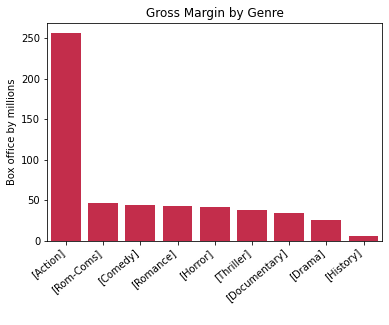

In [150]:

ax = sns.barplot( x=x2, y=y2, color='crimson', ci=None )



ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_ylabel('Box office by millions')
ax.set_xlabel(' ')
ax.set_title('Gross Margin by Genre');

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) 

## plot, using genere of top grossing movies

In [151]:
df_gross_mean = df.groupby(['genre_ids'])['gross_margin_by_millions'].mean()
top_gross = df_gross_mean.sort_values( ascending=False).head(10)

In [152]:
top_gross

genre_ids
[Adventure, Action, Fantasy]                      1191.599038
[Action, Animation]                               1148.258224
[Action, Animation, Comedy, Family, Adventure]     959.727750
[Family, Animation, Drama]                         906.914868
[Animation, Adventure, Family, Comedy]             869.429616
[Fantasy, Romance]                                 843.815419
[Romance, Family, Animation, Fantasy]              843.815419
[Family, Fantasy, Romance]                         843.815419
[Animation, Comedy, Adventure, Family]             784.765137
[Drama, Comedy, Animation, Family]                 679.235992
Name: gross_margin_by_millions, dtype: float64

In [153]:
x1 = top_gross.keys().tolist()
y1 = top_gross.tolist()

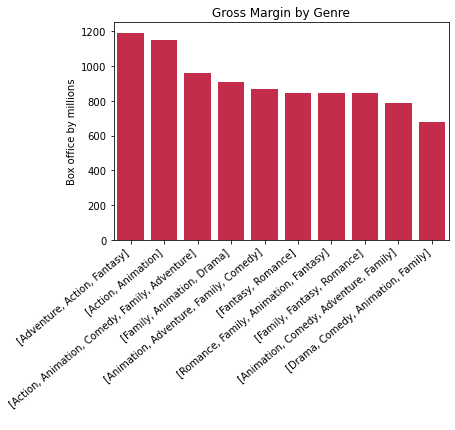

In [154]:
list_of_sub_genere=['Action/Adeventure', 'Action/Animation',
                    'Animation, Comedy, Adventure', 'Family, Animation, Drama', ]
ax = sns.barplot( x=x1, y=y1, color='crimson', ci=None )



ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_ylabel('Box office by millions')
ax.set_xlabel(' ')
ax.set_title('Gross Margin by Genre');

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) 

## exploring im.db.zip



In [155]:
! ls ../../../../../../project-exp/data/im.db   


../../../../../../project-exp/data/im.db


In [156]:
conn = sqlite3.connect('../../../../../../project-exp/data/im.db')

all tables 

In [157]:
pd.read_sql("""

SELECT * 
FROM sqlite_master

""", conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [158]:
pd.read_sql("""

SELECT * 
FROM directors

""", conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [159]:
pd.read_sql("""

SELECT  
        basi.genres,
        COUNT()
        
        

FROM movie_basics AS basi



LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

group by basi.start_year

ORDER BY COUNT() DESC

""", conn)

,genres,COUNT()
0,"Comedy,Drama,Fantasy",17504
1,"Action,Crime,Drama",17272
2,Drama,16849
3,Sci-Fi,16243
4,"Adventure,Comedy,Romance",15589
5,"Action,Crime,Drama",14709
6,"Documentary,History",13787
7,"Animation,Drama,History",12900
8,Drama,11849
9,"Biography,Drama",8379


*Exploring movies that contain 'Drama' among their genres, only considering movies with numvotes above a 1000, went from 30788 values to 5044. got average rating*

In [160]:
Drama_raitings = pd.read_sql("""

SELECT  basi.genres,
        rati.averagerating
        
FROM movie_basics AS basi

LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

WHERE basi.genres LIKE '%Drama%' 
        AND rati.averagerating IS NOT NULL 
        AND rati.numvotes  > 1000


""", conn).mean()[0]

same, but using Action Genre

In [161]:
Action_raitings = pd.read_sql("""

SELECT  basi.genres,
        rati.averagerating
        
FROM movie_basics AS basi

LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

WHERE basi.genres LIKE '%Action%' 
        AND rati.averagerating IS NOT NULL 
        AND rati.numvotes  > 1000


""", conn).mean()[0]

same, but using Thriller/horror  Genre

In [162]:
Thriller_raitings = pd.read_sql("""

SELECT  basi.genres,
        rati.averagerating
        
FROM movie_basics AS basi

LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

WHERE basi.genres LIKE '%Thriller%' 
        AND basi.genres LIKE '%Horror%' 
        AND rati.averagerating IS NOT NULL 
        AND rati.numvotes  > 1000


""", conn).mean()[0]

In [163]:
Fantasy_raitings = pd.read_sql("""

SELECT  basi.genres,
        rati.averagerating
        
FROM movie_basics AS basi

LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

WHERE basi.genres LIKE '%Fantasy%' 
        AND rati.averagerating IS NOT NULL 
        AND rati.numvotes  > 1000


""", conn).mean()[0]
Fantasy_raitings

5.998060344827586

In [164]:
Sci_Fi_raitings = pd.read_sql("""

SELECT  basi.genres,
        rati.averagerating
        
FROM movie_basics AS basi

LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

WHERE basi.genres LIKE '%Sci-Fi%' 
        AND rati.averagerating IS NOT NULL 
        AND rati.numvotes  > 1000


""", conn).mean()[0]
Sci_Fi_raitings

5.714473684210526

In [165]:

Comedy_raitings = pd.read_sql("""

SELECT  basi.genres,
        rati.averagerating
        
FROM movie_basics AS basi

LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

WHERE basi.genres LIKE '%Comedy%' 
        AND rati.averagerating IS NOT NULL 
        AND rati.numvotes  > 1000


""", conn).mean()[0]
Comedy_raitings

6.112916111850865

In [166]:

Adventure_raitings = pd.read_sql("""

SELECT  basi.genres,
        rati.averagerating
        
FROM movie_basics AS basi

LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

WHERE basi.genres LIKE '%Adventure%' 
        AND rati.averagerating IS NOT NULL 
        AND rati.numvotes  > 1000


""", conn).mean()[0]
Adventure_raitings

6.156686626746507

In [167]:

Documentary_raitings = pd.read_sql("""

SELECT  basi.genres,
        rati.averagerating
        
FROM movie_basics AS basi

LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

WHERE basi.genres LIKE '%Documentary%' 
        AND rati.averagerating IS NOT NULL 
        AND rati.numvotes  > 1000


""", conn).mean()[0]

In [168]:
avg_raiting=[Drama_raitings, Action_raitings, Thriller_raitings, Fantasy_raitings, Sci_Fi_raitings, Comedy_raitings, Adventure_raitings, Documentary_raitings]
avg_raiting_name=['Drama', 'Action', 'Thriller', 'Fantasy', 'Sci_Fi', 'Comedy', 'Adventure', 'Documentary']


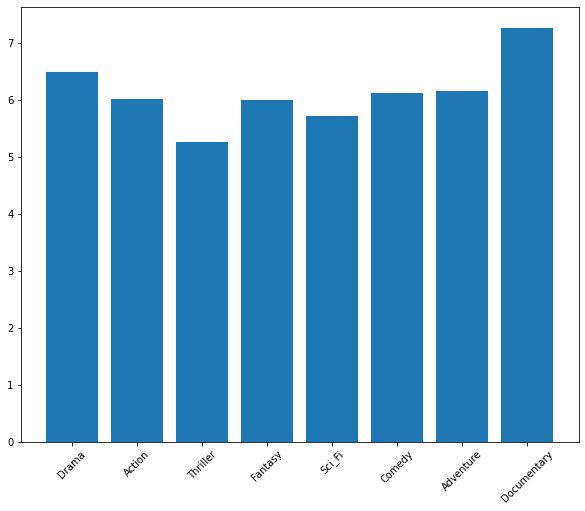

In [169]:
f, ax = plt.subplots(figsize=(10,8))

ax.bar(avg_raiting_name, avg_raiting)

plt.xticks(rotation = 45);